In [1]:
# Import some necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Step 1: Reading the CSV File

In [2]:
import pandas as pd

# Load the dataset
training_data = 'training_data/NLI/train.csv'
df_training = pd.read_csv(training_data)
df_training

,premise,hypothesis,label
0,"However, Fort Charles was rebuilt as a militar...",Fort Charles was rebuilt as an amusement park ...,0
1,Buchanan's The Democrats and Republicans have...,THe parties will never be similar.,0
2,In order to review an acquisition that is usin...,The auditor only reviews the acquisition itsel...,0
3,Three young people sit outside and engage with...,There is a tin can and string telephone.,0
4,The lucrative tin mines of Kuala Lumpur in the...,The Chinese labor was seen as less costly and ...,1
...,...,...,...
26939,Information in agencies' plans and reports pro...,"Thanks to agencies' plans and reports, over $3...",0
26940,"He is the Mr. Magoo of scientific theory, geni...",He understands everything he can't see.,0
26941,"Over the past 25 years, the Postal Service has...",Classifying mail is important to the function ...,1
26942,Whoever first stepped ashore on Madeira discov...,The British discovered the Canary Islands first.,0


In [3]:
validation_data = 'training_data/NLI/dev.csv'
df_validation = pd.read_csv(validation_data)
df_validation

,premise,hypothesis,label
0,Mon Dieu!,This person is speaking English.,0
1,"He really shook up my whole mindset, Broker sa...","His mindset never changed, Broker said.",0
2,Patients were asked to place themselves on a r...,Most patients rated themselves as a 5 on the s...,1
3,I managed to pick-pocket someone next to the s...,I stole someone's wallet near the concession s...,1
4,Forty comments were received and considered pr...,The decisions regarding the issuance of the fi...,1
...,...,...,...
6732,Outstanding in the ground floor collections ar...,Gustave Courbet's work is only featured on the...,0
6733,Aurangzeb streamlined the lax administration o...,Aurangzeb made the administration inefficient ...,0
6734,Re-Analysis of NMMAPS Morbidity Data and Furth...,The re-analysis of NMMAPS morbidity data is a ...,1
6735,"But to refuse, after Topham had spoken for him...",There were no suspicion on either sides.,0


In [4]:
df_validation['hypothesis'] = df_validation['hypothesis'].astype(str)

# Step 2: Preprocessing the Data

In [5]:
# Combine premises & hypotheses for tokenization

training_texts = list(df_training['premise']) + list(df_training['hypothesis']) + list(df_validation['premise']) + list(df_validation['premise'])

# Initialize and fit the tokenizer
training_tokenizer = Tokenizer(num_words=20000)  # Keep the most frequent 10,000words and ignore the rest
training_tokenizer.fit_on_texts(training_texts)

# Convert texts to sequences
training_premise_sequences = training_tokenizer.texts_to_sequences(df_training['premise'])
training_hypothesis_sequences = training_tokenizer.texts_to_sequences(df_training['hypothesis'])
# print(training_premise_sequences)

# Find the maximum sequence length for padding
training_max_len = max(max(len(seq) for seq in training_premise_sequences), max(len(seq) for seq in training_hypothesis_sequences))
training_max_len = min(training_max_len, 500) # Set a maximum length
print(np.mean([len(seq) for seq in training_premise_sequences]))
print(np.mean([len(seq) for seq in training_hypothesis_sequences]))

# print(max_len)

# Pad sequences
training_premise_padded = pad_sequences(training_premise_sequences, maxlen=40, padding='post', truncating='post')
training_hypothesis_padded = pad_sequences(training_hypothesis_sequences, maxlen=40, padding='post', truncating='post')

print(training_premise_padded)
print(len(training_premise_padded))
print(len(training_premise_padded[0]))

18.864348277909738
10.269521971496436
[[  328  2104  1601 ...     0     0     0]
 [10608     1  1782 ...     0     0     0]
 [    6   377     5 ...     0     0     0]
 ...
 [   83     1   434 ...     0     0     0]
 [ 8148   108  3633 ...     0     0     0]
 [   21     8  2768 ...     0     0     0]]
26944
40


In [6]:
# Combine premises & hypotheses for tokenization

# validation_texts = list(df_validation['premise']) + list(df_validation['hypothesis'])
# validation_texts = [str(text) for text in validation_texts]

# # Initialize and fit the tokenizer
# validation_tokenizer = Tokenizer(num_words=10000)  # Keep the most frequent 10,000words and ignore the rest
# validation_tokenizer.fit_on_texts(validation_texts)

# Convert texts to sequences
validation_premise_sequences = training_tokenizer.texts_to_sequences(df_validation['premise'])
validation_hypothesis_sequences = training_tokenizer.texts_to_sequences(df_validation['hypothesis'])
# print(validation_hypothesis_sequences)

# Find the maximum sequence length for padding
validation_max_len = max(max(len(seq) for seq in validation_premise_sequences), max(len(seq) for seq in validation_hypothesis_sequences))
validation_max_len = min(validation_max_len, 500) # Set a maximum length
print(np.mean([len(seq) for seq in validation_premise_sequences]))
print(np.mean([len(seq) for seq in validation_hypothesis_sequences]))

# print(max_len)

# Pad sequences
validation_premise_padded = pad_sequences(validation_premise_sequences, maxlen=40, padding='post', truncating='post')
validation_hypothesis_padded = pad_sequences(validation_hypothesis_sequences, maxlen=40, padding='post', truncating='post')

print(validation_premise_padded)
print(len(validation_premise_padded))
print(len(validation_premise_padded[0]))

18.724506456879915
10.176488051061304
[[ 6445 16141     0 ...     0     0     0]
 [   24    91  2072 ...     0     0     0]
 [  874    38   474 ...     0     0     0]
 ...
 [ 1566   472     4 ...     0     0     0]
 [   21     5  4408 ...     0     0     0]
 [   71  1298     5 ...     0     0     0]]
6737
40


# Step 3: Preparing the Labels

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [8]:
# Getting the labels

# training_labels = df_training['label'].values
# If labels are not integers
training_labels = df_training['label'].astype(int).values
validation_labels = df_validation['label'].astype(int).values

print(training_labels)
print(len(training_labels))
print(validation_labels)
print(len(validation_labels))

[0 0 0 ... 1 0 0]
26944
[0 0 1 ... 1 0 1]
6737


# Step 4: Define the BiLSTM Model

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input, concatenate

In [10]:
import keras.backend as K
from keras.layers import concatenate

In [11]:
from tensorflow.keras.layers import Input, Embedding, Dropout, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model

# Model parameters
vocab_size = 20000
embedding_dim = 128
max_length = 40

# Define inputs
input1 = Input(shape=(max_length,))
input2 = Input(shape=(max_length,))

# Embedding layer common to both inputs
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length)

# Apply embedding layer to both inputs
embedding_premise = Dropout(0.5)(embedding_layer(input1))
embedding_hypothesis = Dropout(0.5)(embedding_layer(input2))

# Define a Bidirectional LSTM
lstm = Bidirectional(LSTM(64))

# Process both inputs through the same LSTM layer
x1 = lstm(embedding_premise)
x1 = Dropout(0.5)(x1)

x2 = lstm(embedding_hypothesis)
x2 = Dropout(0.5)(x2)

# Concatenate the outputs of both branches
x = concatenate([x1, x2], axis=1)

# Dense and output layers
x = Dense(32)(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation="softmax")(x)

# Create the model
model = Model(inputs=[input1, input2], outputs=outputs)


# Compile the model with an optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/Users/haojingtong/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 40, 128)   │  2,560,000 │ input_layer[0][0… │
│ (Embedding)         │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 40, 128)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 40, 128)   │          0 │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     98,816 │ dropout[0][0],    │
│ (Bidirectional)     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ bidirectional[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout_2[0][0],  │
│ (Concatenate)       │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      8,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │         66 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,667,106 (10.17 MB)

 Trainable params: 2,667,106 (10.17 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Training the Model

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Training the model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

history = model.fit([training_hypothesis_padded, training_premise_padded], training_labels,
                    epochs=50,
                    batch_size=64,
                    validation_data=([validation_hypothesis_padded, validation_premise_padded ], validation_labels),
                    callbacks=[early_stopping])

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.5190 - loss: 0.6921 - val_accuracy: 0.5937 - val_loss: 0.6735
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.5981 - loss: 0.6668 - val_accuracy: 0.6341 - val_loss: 0.6382
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.6577 - loss: 0.6231 - val_accuracy: 0.6726 - val_loss: 0.5995
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.7022 - loss: 0.5714 - val_accuracy: 0.6742 - val_loss: 0.5897
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.7398 - loss: 0.5377 - val_accuracy: 0.6783 - val_loss: 0.5885
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.7553 - loss: 0.5146 - val_accuracy: 0.6788 - val_loss: 0.5982
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.7705 - loss: 0.4875 - val_accuracy: 0.6708 - val_loss: 0.6129
Epoch 8/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.7853 - loss: 0.4676 - 

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6860 - loss: 0.5816

Test score/loss: 0.5885474681854248
Test accuracy: 0.6783434748649597
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


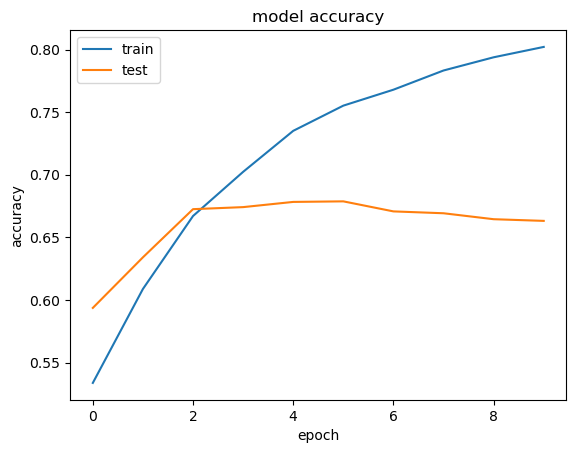

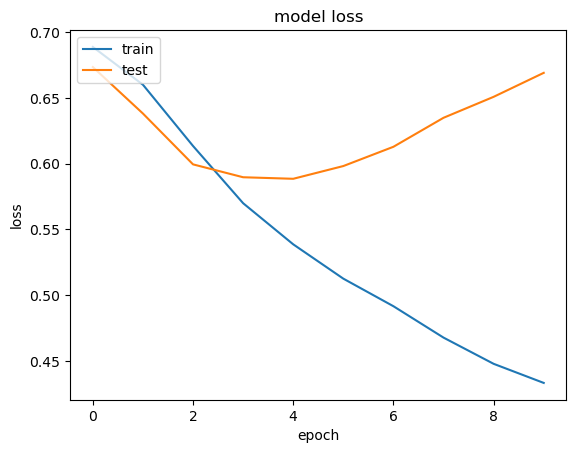

In [17]:
import matplotlib.pyplot as plt

#Testing
score = model.evaluate([validation_hypothesis_padded, validation_premise_padded], validation_labels, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
import pickle
from tensorflow.keras.models import load_model


model.save('model_weights.keras')

# Optionally, you can also pickle the entire architecture string directly if preferred:
# with open('model_architecture.pkl', 'wb') as f:
#     pickle.dump(model, f)


In [31]:
predictions = model.predict([validation_hypothesis_padded, validation_premise_padded])

print(predictions)
# Assuming you have original labels, combine predictions with original data
data_with_predictions = pd.DataFrame({
#     'Original_Labels': validation_labels,
    'Predictions': np.argmax(predictions, axis=1)
})

# Write data with predictions to CSV
data_with_predictions.to_csv('predictions_validation.csv', index=False)


# from sklearn.metrics import accuracy_score

# val_accuracy = accuracy_score(validation_labels, np.argmax(predictions, axis=1))

# print("val Accuracy:", val_accuracy)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[[0.36974707 0.63025296]
 [0.7904384  0.20956165]
 [0.30987895 0.690121  ]
 ...
 [0.36451983 0.6354802 ]
 [0.6848138  0.31518617]
 [0.3415795  0.6584205 ]]
